In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

NameError: name 'mnist' is not defined

In [6]:
from tensorflow.keras.datasets import mnist

ImportError: Could not find 'nvcuda.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Typically it is installed in 'C:\Windows\System32'. If it is not present, ensure that you have a CUDA-capable GPU with the correct driver installed.

In [4]:
X_train.shape

NameError: name 'X_train' is not defined

In [5]:
y_train.shape

NameError: name 'y_train' is not defined

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
sns.set(font_scale=2)

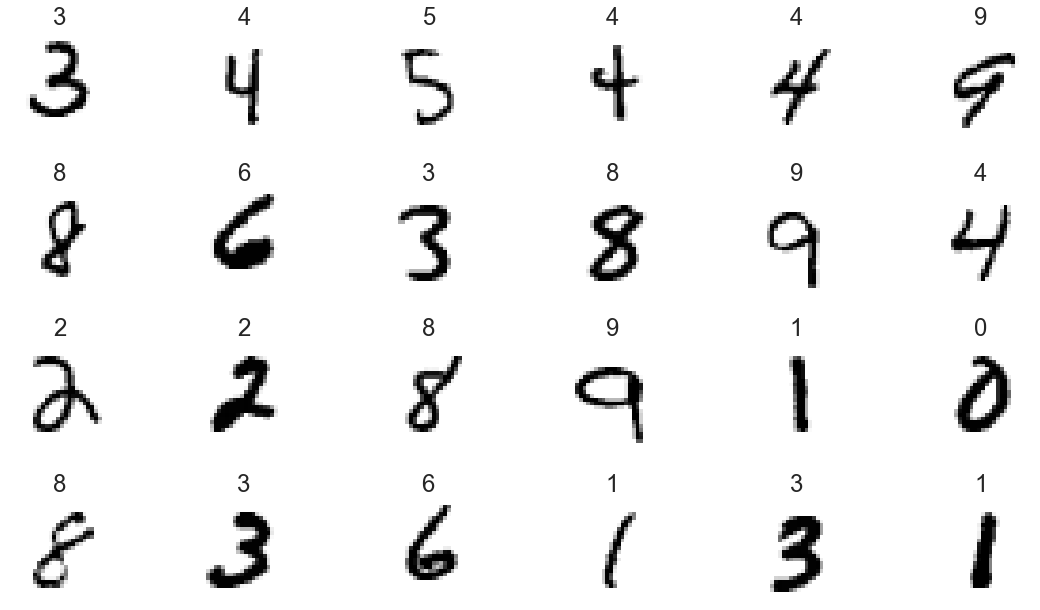

In [11]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [12]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [15]:
X_test.shape

(10000, 28, 28, 1)

In [16]:
X_train = X_train.astype('float32') / 255

In [17]:
X_test = X_test.astype('float32') / 255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train.shape

(60000, 10)

In [21]:
y_train[0]  # one sample’s categorical data

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test = to_categorical(y_test)

In [23]:
y_test.shape

(10000, 10)

In [24]:
from tensorflow.keras.models import Sequential 

In [25]:
cnn = Sequential() 

In [26]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [27]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [28]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
cnn.add(Flatten())

In [32]:
cnn.add(Dense(units=128, activation='relu'))

In [33]:
cnn.add(Dense(units=10, activation='softmax'))

In [34]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               73856     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

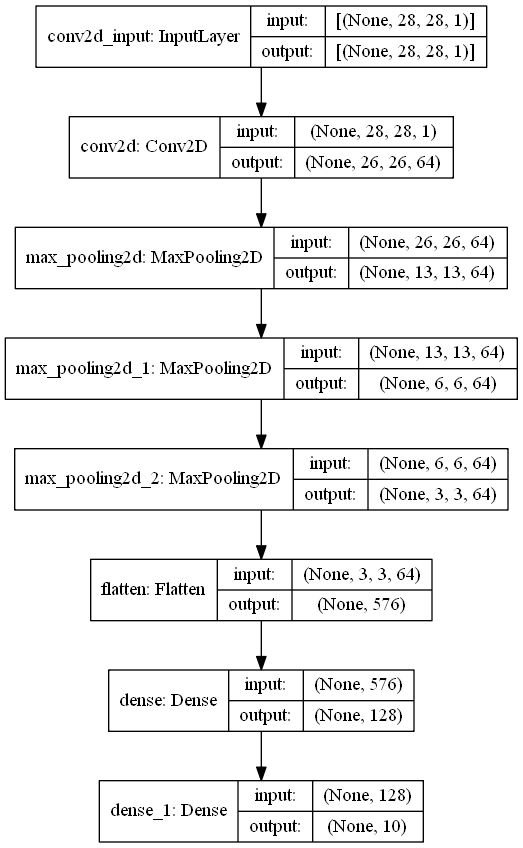

In [35]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [36]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 22s 405us/sample - loss: 0.4362 - acc: 0.8692 - val_loss: 0.1547 - val_acc: 0.9545
Epoch 2/5
54000/54000 [==============================] - 26s 477us/sample - loss: 0.1524 - acc: 0.9524 - val_loss: 0.1129 - val_acc: 0.9673
Epoch 3/5
54000/54000 [==============================] - 24s 449us/sample - loss: 0.1149 - acc: 0.9630 - val_loss: 0.0849 - val_acc: 0.9753
Epoch 4/5
54000/54000 [==============================] - 19s 356us/sample - loss: 0.0937 - acc: 0.9706 - val_loss: 0.0790 - val_acc: 0.9745
Epoch 5/5
54000/54000 [==============================] - 21s 380us/sample - loss: 0.0817 - acc: 0.9737 - val_loss: 0.0690 - val_acc: 0.9792


In [38]:
loss, accuracy = cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 271us/sample - loss: 0.0831 - acc: 0.9737


In [39]:
loss

0.08310184102207423

In [40]:
accuracy

0.9737

In [41]:
predictions = cnn.predict(X_test)

In [42]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [43]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000004696%
1: 0.0000246073%
2: 0.0000808536%
3: 0.0000908831%
4: 0.0000002761%
5: 0.0000003838%
6: 0.0000000001%
7: 99.9997973442%
8: 0.0000012439%
9: 0.0000022554%


In [44]:
images = X_test.reshape((10000, 28, 28))

In [45]:
incorrect_predictions = []

In [46]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [47]:
len(incorrect_predictions)  # number of incorrect predictions

263

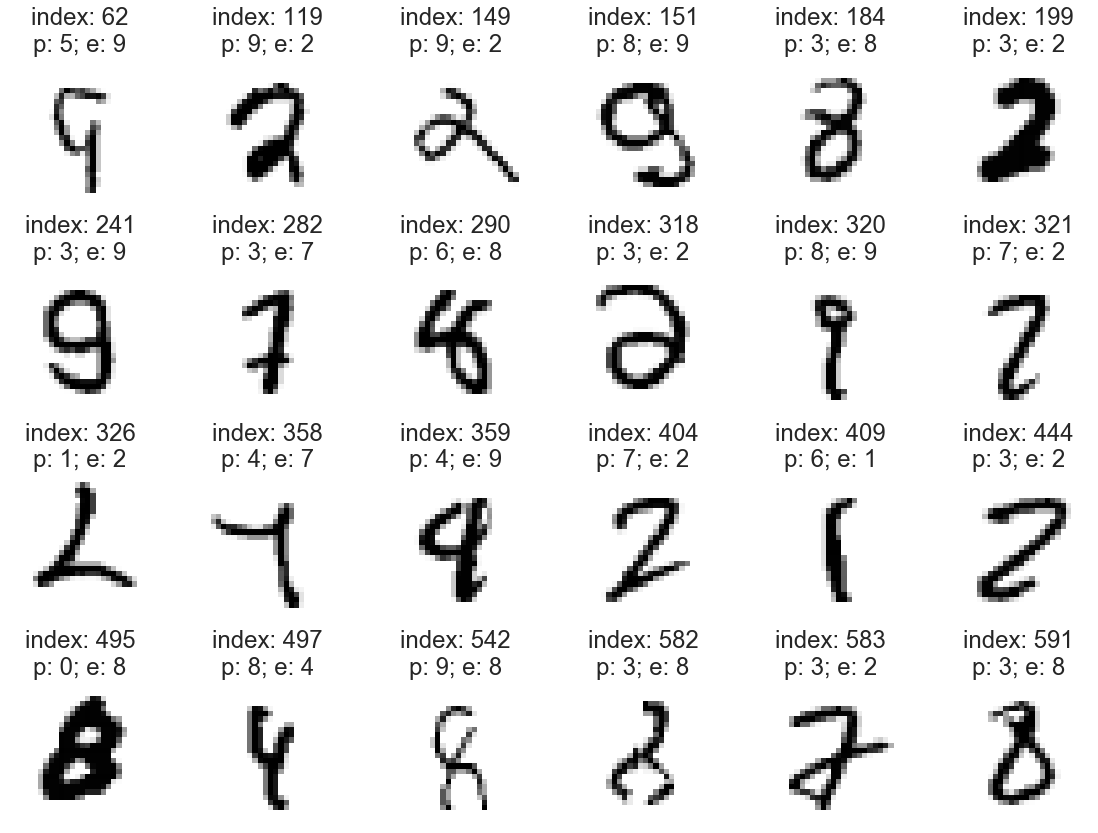

In [48]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [49]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [50]:
display_probabilities(predictions[340])

0: 0.8409736678%
1: 0.1887268038%
2: 0.0004775794%
3: 2.8794059530%
4: 0.3985686228%
5: 70.7551181316%
6: 24.6774494648%
7: 0.0002034492%
8: 0.0708840147%
9: 0.1881876262%


In [51]:
display_probabilities(predictions[740])

0: 0.0004284900%
1: 0.6516416091%
2: 0.0341643550%
3: 2.4894582108%
4: 74.6015071869%
5: 0.0828384364%
6: 0.0000073987%
7: 3.6500915885%
8: 0.0378201366%
9: 18.4520393610%


In [52]:
display_probabilities(predictions[1260])

0: 0.0174794492%
1: 90.5365109444%
2: 0.5966705736%
3: 0.3954279702%
4: 0.0006340120%
5: 0.0762475596%
6: 0.0000876405%
7: 8.2704380155%
8: 0.0967407599%
9: 0.0097578530%


In [53]:
cnn.save('mnist_cnn.h5')